<a href="https://colab.research.google.com/github/marreapato/Deep_Learning_Course/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Oct 16 17:30:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Dataset

1. Stanford dogs datasets
2. Image classification task with 120 categories
3. 20,580 images
4. ~150 images per class
5. Image-level category and bounding-boxes annotations
6. http://vision.stanford.edu/aditya86/ImageNetDogs/

### Download dataset

In [ ]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

--2023-10-16 18:13:04--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  52.6MB/s    in 15s     

2023-10-16 18:13:19 (50.7 MB/s) - ‘images.tar’ saved [793579520/793579520]





1.   x: extract an archive.
2.   v: verbose to print its action on console.
3.   f: which file to perform the action on.




In [ ]:
!tar -xvf images.tar

Streaming output truncated to the last 5000 lines.
Images/n02109047-Great_Dane/n02109047_34148.jpg
Images/n02109047-Great_Dane/n02109047_34162.jpg
Images/n02109047-Great_Dane/n02109047_34209.jpg
Images/n02109047-Great_Dane/n02109047_3643.jpg
Images/n02109047-Great_Dane/n02109047_4267.jpg
Images/n02109047-Great_Dane/n02109047_481.jpg
Images/n02109047-Great_Dane/n02109047_5618.jpg
Images/n02109047-Great_Dane/n02109047_5675.jpg
Images/n02109047-Great_Dane/n02109047_5822.jpg
Images/n02109047-Great_Dane/n02109047_5894.jpg
Images/n02109047-Great_Dane/n02109047_5936.jpg
Images/n02109047-Great_Dane/n02109047_6008.jpg
Images/n02109047-Great_Dane/n02109047_6265.jpg
Images/n02109047-Great_Dane/n02109047_6276.jpg
Images/n02109047-Great_Dane/n02109047_6447.jpg
Images/n02109047-Great_Dane/n02109047_6680.jpg
Images/n02109047-Great_Dane/n02109047_7072.jpg
Images/n02109047-Great_Dane/n02109047_7156.jpg
Images/n02109047-Great_Dane/n02109047_7227.jpg
Images/n02109047-Great_Dane/n02109047_744.jpg
Images/n

In [ ]:
!pwd

/content


In [ ]:
!ls

Images	images.tar  sample_data


### Loading datasets

1. ImageFolder
2. https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html
3. Torchvision Transforms
4. https://pytorch.org/vision/0.15/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

In [ ]:
import torch
from torchvision import transforms, datasets

# Define the data transformation pipeline
train_transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

data_transform = transforms.Compose([
    transforms.Resize((224, 224)),     # Resize the image to (224, 224)
    transforms.ToTensor(),             # Convert image to tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
        ),
    ])

# Specify the root directory of your dataset
data_dir = '/content/Images'

# Create an instance of the ImageFolder dataset
train_dataset = datasets.ImageFolder(root=data_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(root=data_dir, transform=data_transform)

dataset_size = len(train_dataset)
indices = list(range(dataset_size))

In [ ]:
indices[-1]

20579

In [ ]:
test_dataset.class_to_idx

{'n02085620-Chihuahua': 0,
 'n02085782-Japanese_spaniel': 1,
 'n02085936-Maltese_dog': 2,
 'n02086079-Pekinese': 3,
 'n02086240-Shih-Tzu': 4,
 'n02086646-Blenheim_spaniel': 5,
 'n02086910-papillon': 6,
 'n02087046-toy_terrier': 7,
 'n02087394-Rhodesian_ridgeback': 8,
 'n02088094-Afghan_hound': 9,
 'n02088238-basset': 10,
 'n02088364-beagle': 11,
 'n02088466-bloodhound': 12,
 'n02088632-bluetick': 13,
 'n02089078-black-and-tan_coonhound': 14,
 'n02089867-Walker_hound': 15,
 'n02089973-English_foxhound': 16,
 'n02090379-redbone': 17,
 'n02090622-borzoi': 18,
 'n02090721-Irish_wolfhound': 19,
 'n02091032-Italian_greyhound': 20,
 'n02091134-whippet': 21,
 'n02091244-Ibizan_hound': 22,
 'n02091467-Norwegian_elkhound': 23,
 'n02091635-otterhound': 24,
 'n02091831-Saluki': 25,
 'n02092002-Scottish_deerhound': 26,
 'n02092339-Weimaraner': 27,
 'n02093256-Staffordshire_bullterrier': 28,
 'n02093428-American_Staffordshire_terrier': 29,
 'n02093647-Bedlington_terrier': 30,
 'n02093754-Border_terr

### Dataset splits

1. Using train_test_split from sklearn
2. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
3. Using SubsetRandomSampler from torch
4. https://pytorch.org/docs/stable/data.html#torch.utils.data.SubsetRandomSampler

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(indices, test_size=0.2)
print(len(train_idx), len(test_idx))

# Create a DataLoader to load data in batches
batch_size = 64

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    #shuffle=True,
    sampler=train_sampler
    )

test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    #shuffle=True,
    sampler=test_sampler
    )

# Iterate through the DataLoader
for inputs, labels in train_dataloader:
    print(inputs.shape, labels)
    #print(labels.min(), labels.max())
    break

16464 4116
torch.Size([64, 3, 224, 224]) tensor([101,  86, 105,  97,  76,   4,  40,  62,  96,  92,  73,  40,  92,  41,
         41, 102,  68, 118,  38, 114,  16,  46, 103,  91,  25,   4,  13,  11,
         92,   7,  26,   7, 101,  34,   9, 115,  42,  87,  29, 116,   2,  42,
         21,  29,  53,  52,  69,  18,  69,  38,   7,  17, 119, 112,  90, 102,
         40,  64,  17, 119,  59,  72,  93, 114])


# Timm

1. timm is a library containing SOTA computer vision models, layers, utilities, optimizers, schedulers, data-loaders, augmentations, and training/evaluation scripts.
2. It comes packaged with >700 pretrained models, and is designed to be flexible and easy to use.
3. https://huggingface.co/docs/timm/index
4. Good review: https://towardsdatascience.com/getting-started-with-pytorch-image-models-timm-a-practitioners-guide-4e77b4bf9055


In [ ]:
import torch

torch.__version__

'2.0.1+cu118'

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.1 MB/s eta 0:00:00


In [ ]:
import timm

In [ ]:
timm.list_models(pretrained=True), len(timm.list_models(pretrained=True))

(['bat_resnext26ts.ch_in1k',
  'beit_base_patch16_224.in22k_ft_in22k',
  'beit_base_patch16_224.in22k_ft_in22k_in1k',
  'beit_base_patch16_384.in22k_ft_in22k_in1k',
  'beit_large_patch16_224.in22k_ft_in22k',
  'beit_large_patch16_224.in22k_ft_in22k_in1k',
  'beit_large_patch16_384.in22k_ft_in22k_in1k',
  'beit_large_patch16_512.in22k_ft_in22k_in1k',
  'beitv2_base_patch16_224.in1k_ft_in1k',
  'beitv2_base_patch16_224.in1k_ft_in22k',
  'beitv2_base_patch16_224.in1k_ft_in22k_in1k',
  'beitv2_large_patch16_224.in1k_ft_in1k',
  'beitv2_large_patch16_224.in1k_ft_in22k',
  'beitv2_large_patch16_224.in1k_ft_in22k_in1k',
  'botnet26t_256.c1_in1k',
  'caformer_b36.sail_in1k',
  'caformer_b36.sail_in1k_384',
  'caformer_b36.sail_in22k',
  'caformer_b36.sail_in22k_ft_in1k',
  'caformer_b36.sail_in22k_ft_in1k_384',
  'caformer_m36.sail_in1k',
  'caformer_m36.sail_in1k_384',
  'caformer_m36.sail_in22k',
  'caformer_m36.sail_in22k_ft_in1k',
  'caformer_m36.sail_in22k_ft_in1k_384',
  'caformer_s18.sa

# Vision Transformers

1. AN IMAGE IS WORTH 16X16 WORDS: TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE
2. Dosovitskiy, A., Beyer, L., Kolesnikov, A., Weissenborn, D., Zhai, X., Unterthiner, T., ... & Houlsby, N. (2020, October). An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale. In International Conference on Learning Representations.
3. https://arxiv.org/pdf/2010.11929.pdf

In [ ]:
timm.list_models('*vit*')

['convit_base',
 'convit_small',
 'convit_tiny',
 'crossvit_9_240',
 'crossvit_9_dagger_240',
 'crossvit_15_240',
 'crossvit_15_dagger_240',
 'crossvit_15_dagger_408',
 'crossvit_18_240',
 'crossvit_18_dagger_240',
 'crossvit_18_dagger_408',
 'crossvit_base_240',
 'crossvit_small_240',
 'crossvit_tiny_240',
 'davit_base',
 'davit_giant',
 'davit_huge',
 'davit_large',
 'davit_small',
 'davit_tiny',
 'efficientvit_b0',
 'efficientvit_b1',
 'efficientvit_b2',
 'efficientvit_b3',
 'efficientvit_m0',
 'efficientvit_m1',
 'efficientvit_m2',
 'efficientvit_m3',
 'efficientvit_m4',
 'efficientvit_m5',
 'fastvit_ma36',
 'fastvit_s12',
 'fastvit_sa12',
 'fastvit_sa24',
 'fastvit_sa36',
 'fastvit_t8',
 'fastvit_t12',
 'flexivit_base',
 'flexivit_large',
 'flexivit_small',
 'gcvit_base',
 'gcvit_small',
 'gcvit_tiny',
 'gcvit_xtiny',
 'gcvit_xxtiny',
 'levit_128',
 'levit_128s',
 'levit_192',
 'levit_256',
 'levit_256d',
 'levit_384',
 'levit_384_s8',
 'levit_512',
 'levit_512_s8',
 'levit_512d',

### Dino

1. Self-supervised trained models
1. https://ai.meta.com/blog/dino-paws-computer-vision-with-self-supervised-transformers-and-10x-more-efficient-training/

In [ ]:
timm.list_models('*dino*')

['vit_base_patch14_dinov2',
 'vit_giant_patch14_dinov2',
 'vit_large_patch14_dinov2',
 'vit_small_patch14_dinov2']

### CLIP

1. Vision-Language Models
2. ~ 400 millions (Image, Text) pair
3. https://github.com/openai/CLIP
3. Review: https://huggingface.co/blog/vision_language_pretraining

In [ ]:
timm.list_models('*clip*')

['eva02_base_patch16_clip_224',
 'eva02_enormous_patch14_clip_224',
 'eva02_large_patch14_clip_224',
 'eva02_large_patch14_clip_336',
 'eva_giant_patch14_clip_224',
 'vit_base_patch16_clip_224',
 'vit_base_patch16_clip_384',
 'vit_base_patch32_clip_224',
 'vit_base_patch32_clip_384',
 'vit_base_patch32_clip_448',
 'vit_giant_patch14_clip_224',
 'vit_gigantic_patch14_clip_224',
 'vit_huge_patch14_clip_224',
 'vit_huge_patch14_clip_336',
 'vit_large_patch14_clip_224',
 'vit_large_patch14_clip_336']

# Training pipeline

In [ ]:
model = timm.create_model('vit_tiny_patch16_224', pretrained=True, num_classes=120)

model.safetensors:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

In [ ]:
model

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 192, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=192, out_features=576, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=192, out_features=192, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=192, out_features=768, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity()


In [ ]:
x     = torch.randn(1, 3, 224, 224)
model(x).shape

torch.Size([1, 120])

In [ ]:
model.forward_features(x).shape

torch.Size([1, 197, 192])

In [ ]:
model.pretrained_cfg

{'url': 'https://storage.googleapis.com/vit_models/augreg/Ti_16-i21k-300ep-lr_0.001-aug_none-wd_0.03-do_0.0-sd_0.0--imagenet2012-steps_20k-lr_0.03-res_224.npz',
 'hf_hub_id': 'timm/vit_tiny_patch16_224.augreg_in21k_ft_in1k',
 'architecture': 'vit_tiny_patch16_224',
 'tag': 'augreg_in21k_ft_in1k',
 'custom_load': True,
 'input_size': (3, 224, 224),
 'fixed_input_size': True,
 'interpolation': 'bicubic',
 'crop_pct': 0.9,
 'crop_mode': 'center',
 'mean': (0.5, 0.5, 0.5),
 'std': (0.5, 0.5, 0.5),
 'num_classes': 1000,
 'pool_size': None,
 'first_conv': 'patch_embed.proj',
 'classifier': 'head'}

# Training pipeline

## Evaluate


[[0], [1], [5]] -> [0, 1, 5]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from tqdm.notebook import tqdm

def evaluate(dataloader, model):
  model.cuda()
  model.eval()

  targets = []
  all_preds = []

  for x, y in tqdm(dataloader):
    logits = model(x.cuda())
    pred = logits.argmax(1).flatten().cpu().tolist()

    targets.extend(y.cpu().tolist())
    all_preds.extend(pred)

  acc = accuracy_score(y_true=targets, y_pred=all_preds)
  cm = confusion_matrix(y_true=targets, y_pred=all_preds)
  f1 = f1_score(y_true=targets, y_pred=all_preds, average='weighted')

  return acc, cm, f1

evaluate(test_dataloader, model)

  0%|          | 0/65 [00:00<?, ?it/s]

(0.013119533527696793,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 2],
        [0, 0, 0, ..., 0, 0, 3],
        [0, 0, 0, ..., 0, 0, 2]]),
 0.007240959618306876)

## Epoch

In [ ]:
def epoch(dataloader, model, criterion, optimizer):
  model.cuda()
  model.train()

  epoch_loss = 0.0
  num_batches = 0

  for x, y in tqdm(dataloader):
    # erase the current model gradients
    optimizer.zero_grad()

    # forward
    logits = model(x.cuda())
    loss = criterion(input=logits, target=y.cuda())

    # backward
    loss.backward()

    # weights update ~ w = w_cur - lr*grad(loss, w)
    optimizer.step()

    epoch_loss += loss.detach().cpu().item()
    num_batches += 1

  return epoch_loss/num_batches

## Pipeline



1.   Define criterion (https://pytorch.org/docs/stable/nn.html#loss-functions)
2.   Define optimizer (https://pytorch.org/docs/stable/optim.html)
3.   Define hyperparameters (i.e. num epochs, learning rate, ...)
4.   Training loop



In [ ]:
summary = {
    'model_state':None,
    'f1_history':[],
    'acc_history':[],
    'cm_history':[],
    'train_loss_history':[]
}

lr = 1e-3
num_epochs = 3
best_acc = 0.0

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = torch.nn.CrossEntropyLoss(weight=None)


for e in range(num_epochs):
  print('Epoch:', e)
  cur_loss = epoch(train_dataloader, model, criterion, optimizer)
  test_acc, test_cm, test_f1 = evaluate(test_dataloader, model)

  summary['f1_history'].append(test_f1)
  summary['acc_history'].append(test_acc)
  summary['cm_history'].append(test_cm)
  summary['train_loss_history'].append(cur_loss)

  if test_acc > best_acc:
    summary['model_state'] = model.state_dict()
    best_acc = test_acc

  print('\t Training loss:', cur_loss)
  print('\t Test accuracy:', test_acc)
  print('\t Test confusion-matrix:', test_cm)
  print('\t Test F1:', test_f1)
  print()

summary_path = 'summary.pth'

torch.save(summary, summary_path)

Epoch: 0


  0%|          | 0/258 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

	 Training loss: 4.66429262198219
	 Test accuracy: 0.01652089407191448
	 Test confusion-matrix: [[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 2 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
	 Test F1: 0.004608961418322415

Epoch: 1


  0%|          | 0/258 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

	 Training loss: 4.294068122094916
	 Test accuracy: 0.038872691933916424
	 Test confusion-matrix: [[0 1 0 ... 0 0 0]
 [0 8 1 ... 0 0 0]
 [0 1 8 ... 0 0 0]
 ...
 [0 0 1 ... 3 1 1]
 [0 0 2 ... 0 6 1]
 [0 1 1 ... 0 0 5]]
	 Test F1: 0.02313213034191918

Epoch: 2


  0%|          | 0/258 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

	 Training loss: 3.975857988808506
	 Test accuracy: 0.04859086491739553
	 Test confusion-matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 1 7 0]
 [0 0 1 ... 0 6 0]
 [0 0 0 ... 0 0 0]]
	 Test F1: 0.032505954322515886



In [ ]:
summary_path = 'summary-5.pth'

torch.save(summary, summary_path)

# Loading summary

1. Loading and saving torch checkpoint
2. https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_a_general_checkpoint.html

In [ ]:
ckp = torch.load('summary-5.pth')

### Summary keys and values

In [ ]:
ckp

{'model_state': OrderedDict([('cls_token',
               tensor([[[-3.1434e-01, -6.6227e-03, -5.0576e-02,  5.7642e-02,  5.8867e-02,
                          1.1555e-01, -8.8832e-02,  8.3199e-01,  4.8285e-02, -2.0744e-02,
                          1.1564e-01,  4.1050e-02, -1.6854e-03,  6.8437e-02,  2.0814e-01,
                          1.1943e-02,  1.1865e-02,  1.3581e+00,  7.6381e-01, -3.6998e-02,
                          1.0600e-01, -1.4224e+00,  2.3430e-02, -3.8358e-02,  4.1675e-02,
                          2.7861e-02,  2.3419e-01,  7.2250e-02,  3.0827e-03,  7.8334e-02,
                         -8.8726e-01,  5.8986e-01,  7.9218e-03, -4.9731e-01, -2.5265e-02,
                          6.3735e-02,  8.6995e-02,  2.1077e-01,  5.8139e-02,  5.8406e-02,
                         -2.1847e-02,  1.6797e-01, -2.1965e-03,  6.4593e-01,  2.9811e-01,
                          3.7738e-02,  1.7878e-02,  5.9919e-01,  3.2709e-01,  2.2965e-01,
                         -5.5357e-02,  1.4434e+00, -2.896

## Plot metrics

1. F1 and Accuracy
2. Confusion-matrix

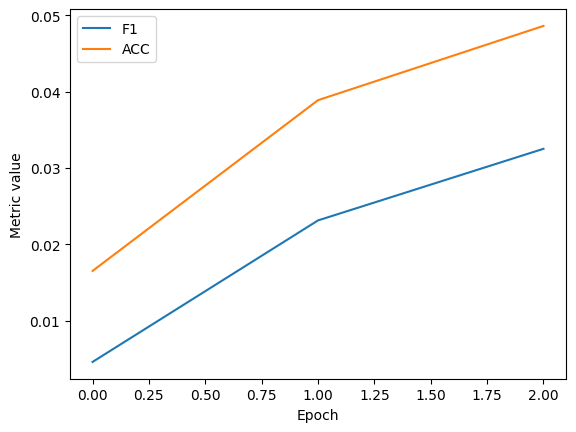

In [ ]:
import matplotlib.pyplot as plt


plt.plot(ckp['f1_history'], label='F1')
plt.plot(ckp['acc_history'], label='ACC')
plt.legend()

plt.xlabel('Epoch')
plt.ylabel('Metric value')

plt.show()

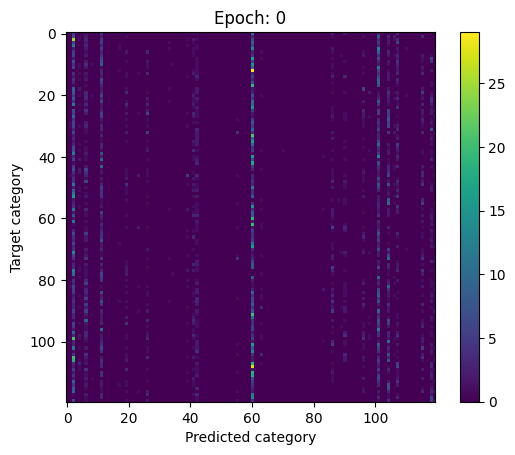

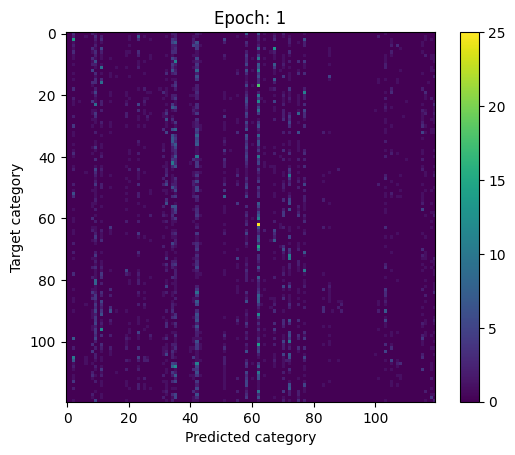

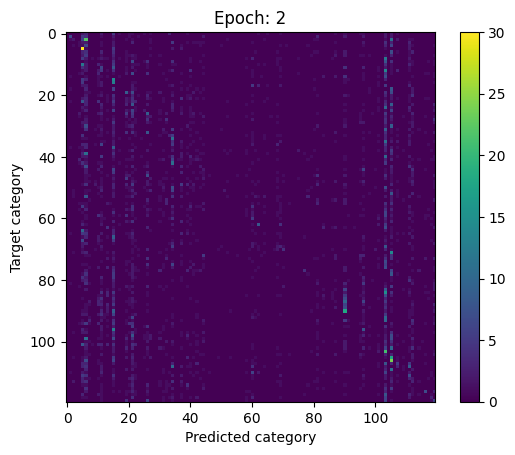

In [ ]:
import matplotlib.pyplot as plt

for idx in range(len(ckp['cm_history'])):
  plt.imshow(ckp['cm_history'][idx], label='F1')

  plt.ylabel('Target category')
  plt.xlabel('Predicted category')

  plt.colorbar()
  plt.title(f'Epoch: {idx}')
  plt.show()

## Loading model state

1. strict https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict

In [ ]:
new_model = timm.create_model('vit_tiny_patch16_224', pretrained=True, num_classes=120)
new_model.load_state_dict(ckp['model_state'])

<All keys matched successfully>

In [ ]:
new_model

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 192, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=192, out_features=576, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=192, out_features=192, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=192, out_features=768, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity()
